210107096 Vineet R Jagga

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Importing Data

In [ ]:
wine_data=pd.read_csv('winequality-red.csv')

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_data.shape

(1599, 12)

In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Detect Outliers

In [ ]:
# Define the numerical columns
numerical_columns = ['fixed acidity', 'volatile acidity', 'citric acid',
                     'residual sugar', 'chlorides', 'free sulfur dioxide',
                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Function to detect outliers using z-score method
def detect_outliers(df, columns, threshold=3):
    outliers = []
    for col in columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outliers.extend(df[(z_scores.abs() > threshold)].index)
    return list(set(outliers))

# Detect outliers
outliers_indices = detect_outliers(wine_data, numerical_columns)

# Print the indices of outliers
print("Indices of outliers:", outliers_indices)

Indices of outliers: [515, 13, 14, 15, 17, 1043, 19, 1558, 1051, 544, 33, 1570, 38, 1574, 554, 555, 42, 557, 45, 1071, 43, 1074, 1589, 1079, 568, 1081, 57, 584, 588, 591, 81, 595, 83, 86, 1111, 88, 1114, 91, 92, 95, 608, 614, 106, 1131, 109, 120, 636, 126, 127, 639, 1154, 649, 651, 652, 1165, 142, 144, 147, 151, 1175, 672, 1186, 163, 164, 169, 684, 690, 692, 181, 695, 199, 1231, 1235, 724, 723, 730, 1244, 226, 1260, 240, 754, 243, 244, 1269, 1270, 258, 776, 777, 1288, 1289, 1295, 1296, 274, 1299, 1300, 281, 795, 1312, 291, 1316, 1319, 1321, 821, 324, 325, 836, 837, 1358, 339, 340, 1367, 1370, 347, 1372, 1374, 354, 374, 889, 381, 391, 396, 911, 400, 917, 1434, 923, 1435, 925, 926, 442, 1474, 451, 1476, 467, 1493, 982, 1496, 480, 494, 1017, 1018]


Remove Outliers

In [ ]:
# Define the numerical columns
numerical_columns = ['fixed acidity', 'volatile acidity', 'citric acid',
                     'residual sugar', 'chlorides', 'free sulfur dioxide',
                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Function to remove outliers using z-score method
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        df = df[(z_scores.abs() < threshold)]
    return df

# Remove outliers
wine_data_no_outliers = remove_outliers(wine_data, numerical_columns)

# Print the shape before and after removing outliers
print("Shape before removing outliers:", wine_data.shape)
print("Shape after removing outliers:", wine_data_no_outliers.shape)

Shape before removing outliers: (1599, 12)
Shape after removing outliers: (1431, 12)


Data Visualization

<Figure size 500x600 with 0 Axes>

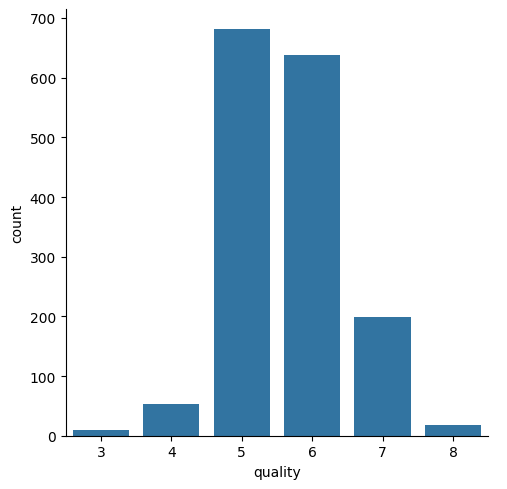

In [ ]:
# mostly wines are having quality of 5,6
plt.figure(figsize=(5,6))
sns.catplot(x='quality',data=wine_data,kind='count')

<Figure size 500x600 with 0 Axes>

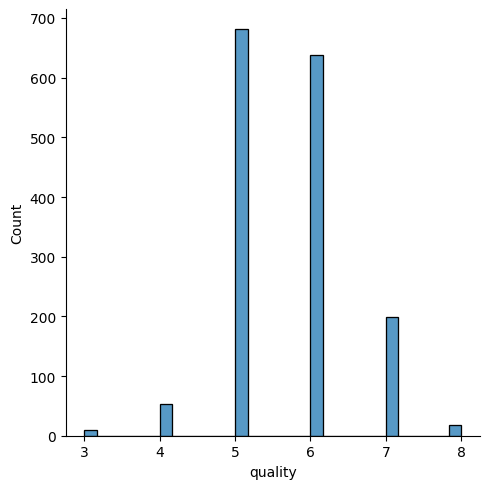

In [ ]:
plt.figure(figsize=(5,6))
sns.displot(x=wine_data['quality'])

<Axes: >

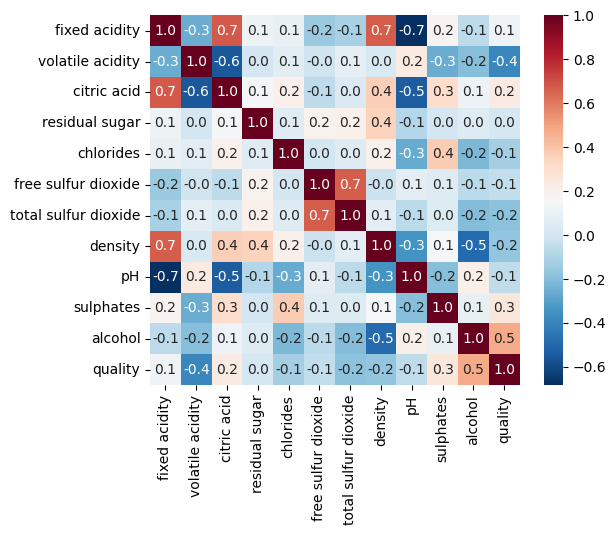

In [ ]:
correlation=wine_data.corr()
sns.heatmap(correlation,annot=True,cbar=True,square=True,fmt='.1f',cmap="RdBu_r")
# from here we can see alcohol is showing the maximum positive correlation with quality

Data Preprocessing

In [ ]:
wine_data['quality']=wine_data['quality'].apply(lambda x: 1 if x>=7 else 0)

In [ ]:
wine_data['quality'].head()

,quality
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [ ]:
wine_data_scaled=scale.fit_transform(wine_data)

In [ ]:
wine_data_scaled=pd.DataFrame(wine_data_scaled)

In [ ]:
wine_data_scaled.columns=wine_data.columns

In [ ]:
wine_data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


In [ ]:
X=wine_data_scaled.drop('quality',axis=1)
y=wine_data_scaled.quality

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape)

(1279, 11) (320, 11)


In [ ]:
param={
    'n_estimators':[50,100,75,200],
    'max_depth':[20,30,40],
    'min_samples_split':[1,2,5,10]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gsv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=5,scoring='accuracy')

In [ ]:
gsv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 40],
                         'min_samples_split': [1, 2, 5, 10],
                         'n_estimators': [50, 100, 75, 200]},
             scoring='accuracy')

In [ ]:
gsv.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=75)

In [ ]:
model=gsv.best_estimator_

In [ ]:
model.score(X_test,y_test)

0.903125

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

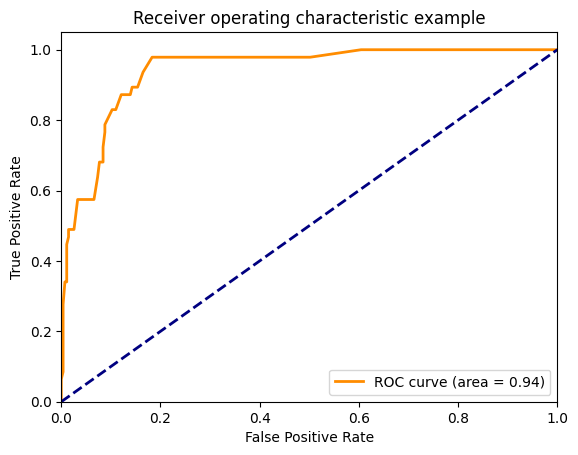

In [ ]:
# prompt: give correlation matrix and roc curve for above classifiaction

import matplotlib.pyplot as plt
# Correlation matrix
correlation_matrix = wine_data.corr()
print(correlation_matrix)

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:


# Define features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.865625
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



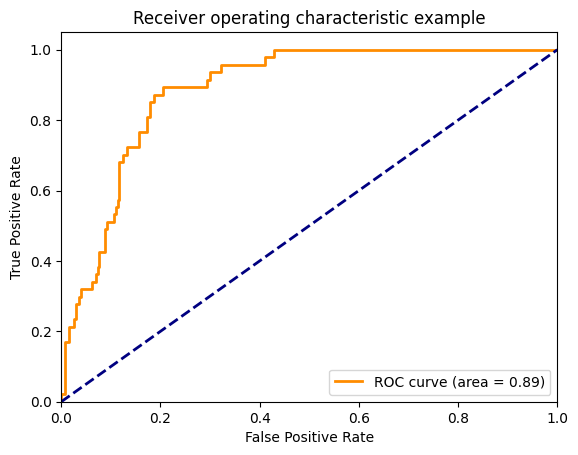

In [ ]:
# prompt: plot the roc curve for the above logistic regression

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.865625
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



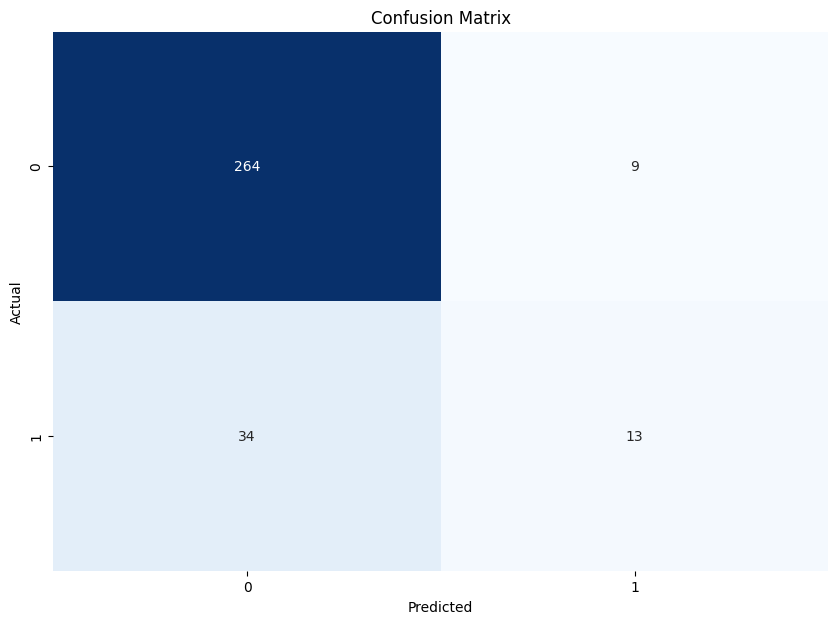

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNeighborsClassifier

Accuracy: 0.88125
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.65      0.43      0.51        47

    accuracy                           0.88       320
   macro avg       0.78      0.69      0.72       320
weighted avg       0.87      0.88      0.87       320



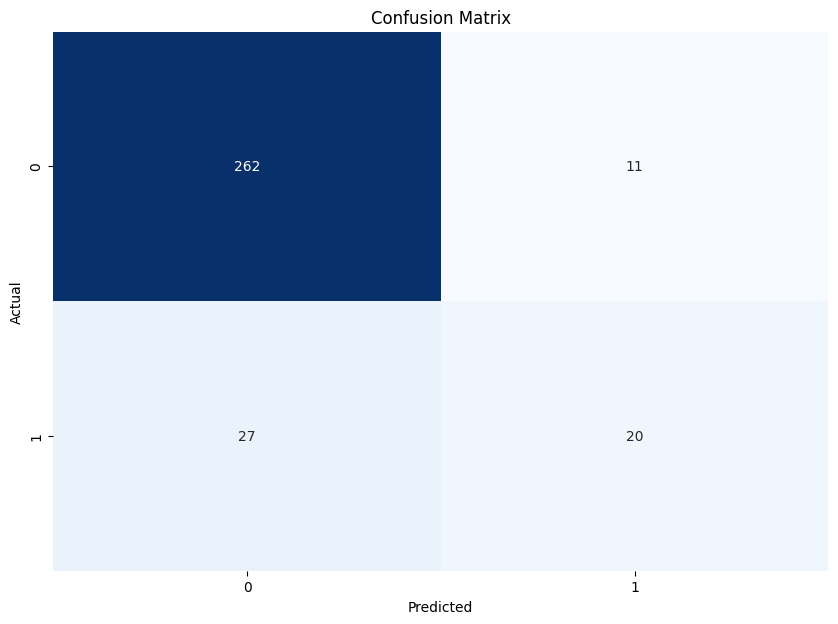

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

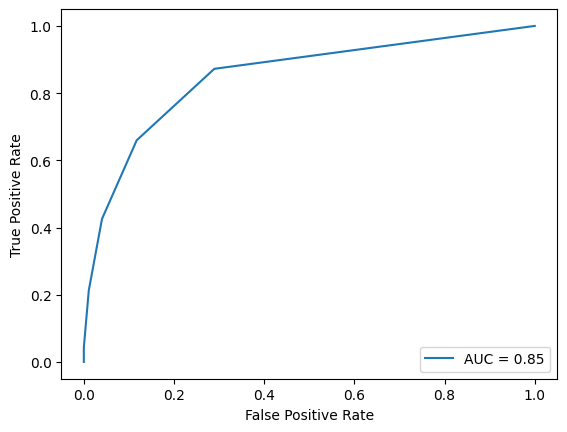

In [ ]:
# prompt: find roc curve for above KNN classification

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier

# Get predicted probabilities for the test set
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Create ROC curve display
# Create ROC curve display
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# Show the plot
plt.show()


Support Vector Machine

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



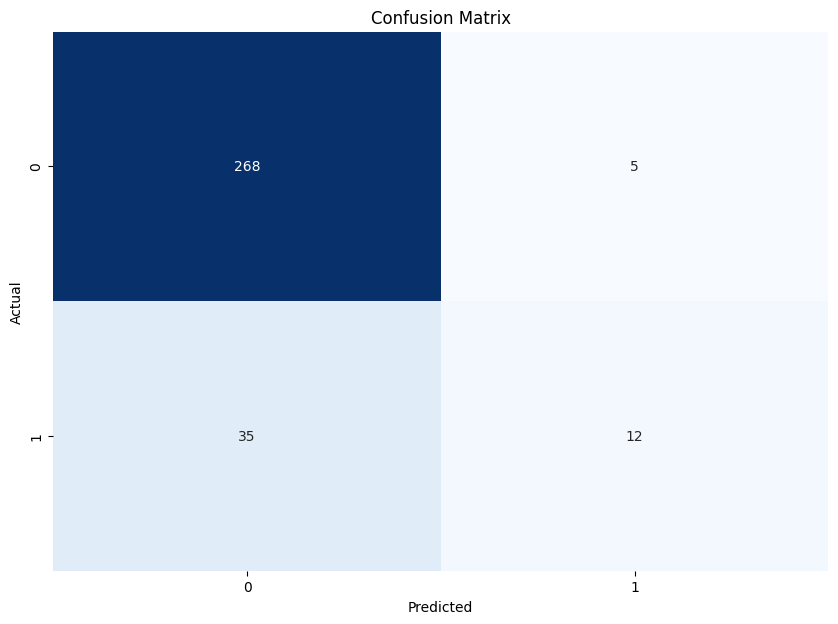

In [ ]:
from sklearn.svm import SVC
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM classifier
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



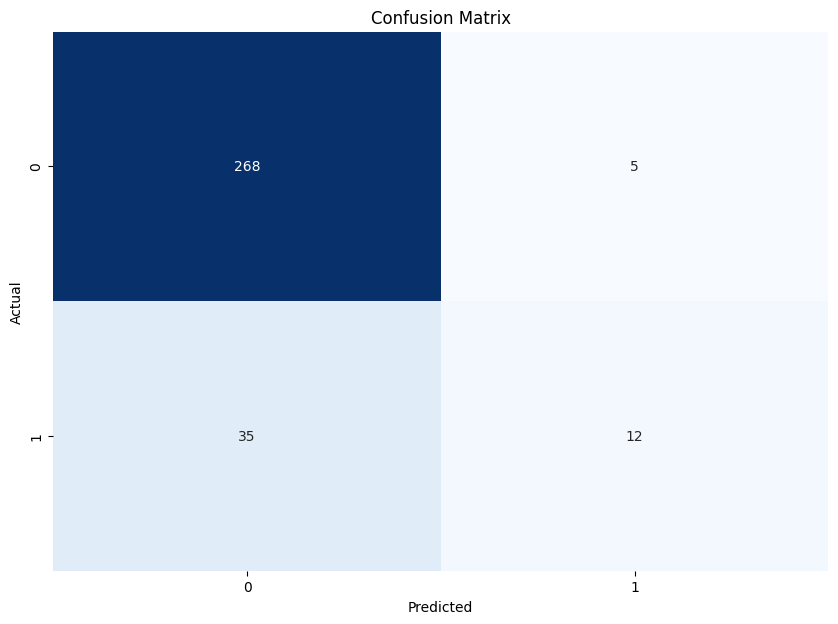

In [ ]:
from sklearn.svm import SVC
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM classifier
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Get predicted probabilities for the test set
y_proba = svm.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Create ROC curve display
# Create ROC


Hyper Parameter tuning for RandomForest Classifier


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.903125
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



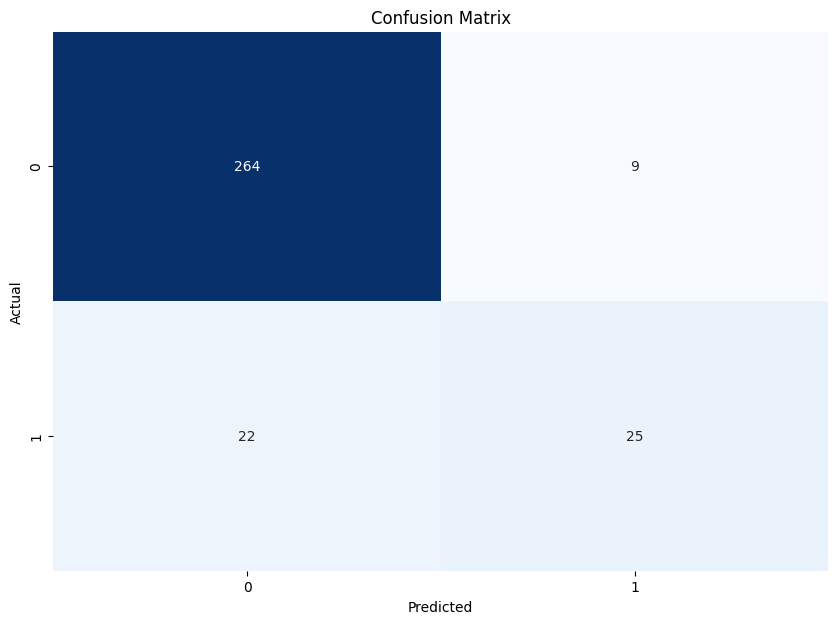

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions
y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Build confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()